In [3]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
df
#These are datasets of two regions(Bejaia region and Sidi bel abaes region)

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
#Removing the header
df = df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


**DATA CLEANING**

In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df.isnull().any()

day            False
month           True
year            True
Temperature     True
 RH             True
 Ws             True
Rain            True
FFMC            True
DMC             True
DC              True
ISI             True
BUI             True
FWI             True
Classes         True
dtype: bool

In [8]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 246, dtype: bool

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.loc[122:,"Region"] = 1 #Creating a new column ("Region") to segregate two regions with numbers
df.loc[:122,"Region"] = 0

In [11]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [12]:
df["Region"] = df["Region"].astype(int)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [13]:
df = df.dropna().reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [14]:
df.iloc[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
124,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
125,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
126,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [15]:
#Removing the column indices for 2nd region
df= df.drop(index=122).reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [16]:
df.loc[120:]
#Checking if rows are alright

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
#Fix Spaces in Column Names
df.columns = df.columns.str.strip()

In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [22]:
#Converting the required columns in the int data type
df[["day", "month","year","Temperature","RH","Ws"]] = df[["day", "month","year","Temperature","RH","Ws"]].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [24]:
for feature in df.columns:
    if df[feature].dtype == "O":
        if feature != "Classes":
            df[feature] = df[feature].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [26]:
## Making a CSV of our cleaned dataset
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv", index = False)

**EDA**

In [27]:
df_copy = df.copy()
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [28]:
df_copy["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [29]:
df_copy["Classes"] = np.where(df_copy["Classes"].str.replace(" ", "") == "notfire",0,1)
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [30]:
df_copy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

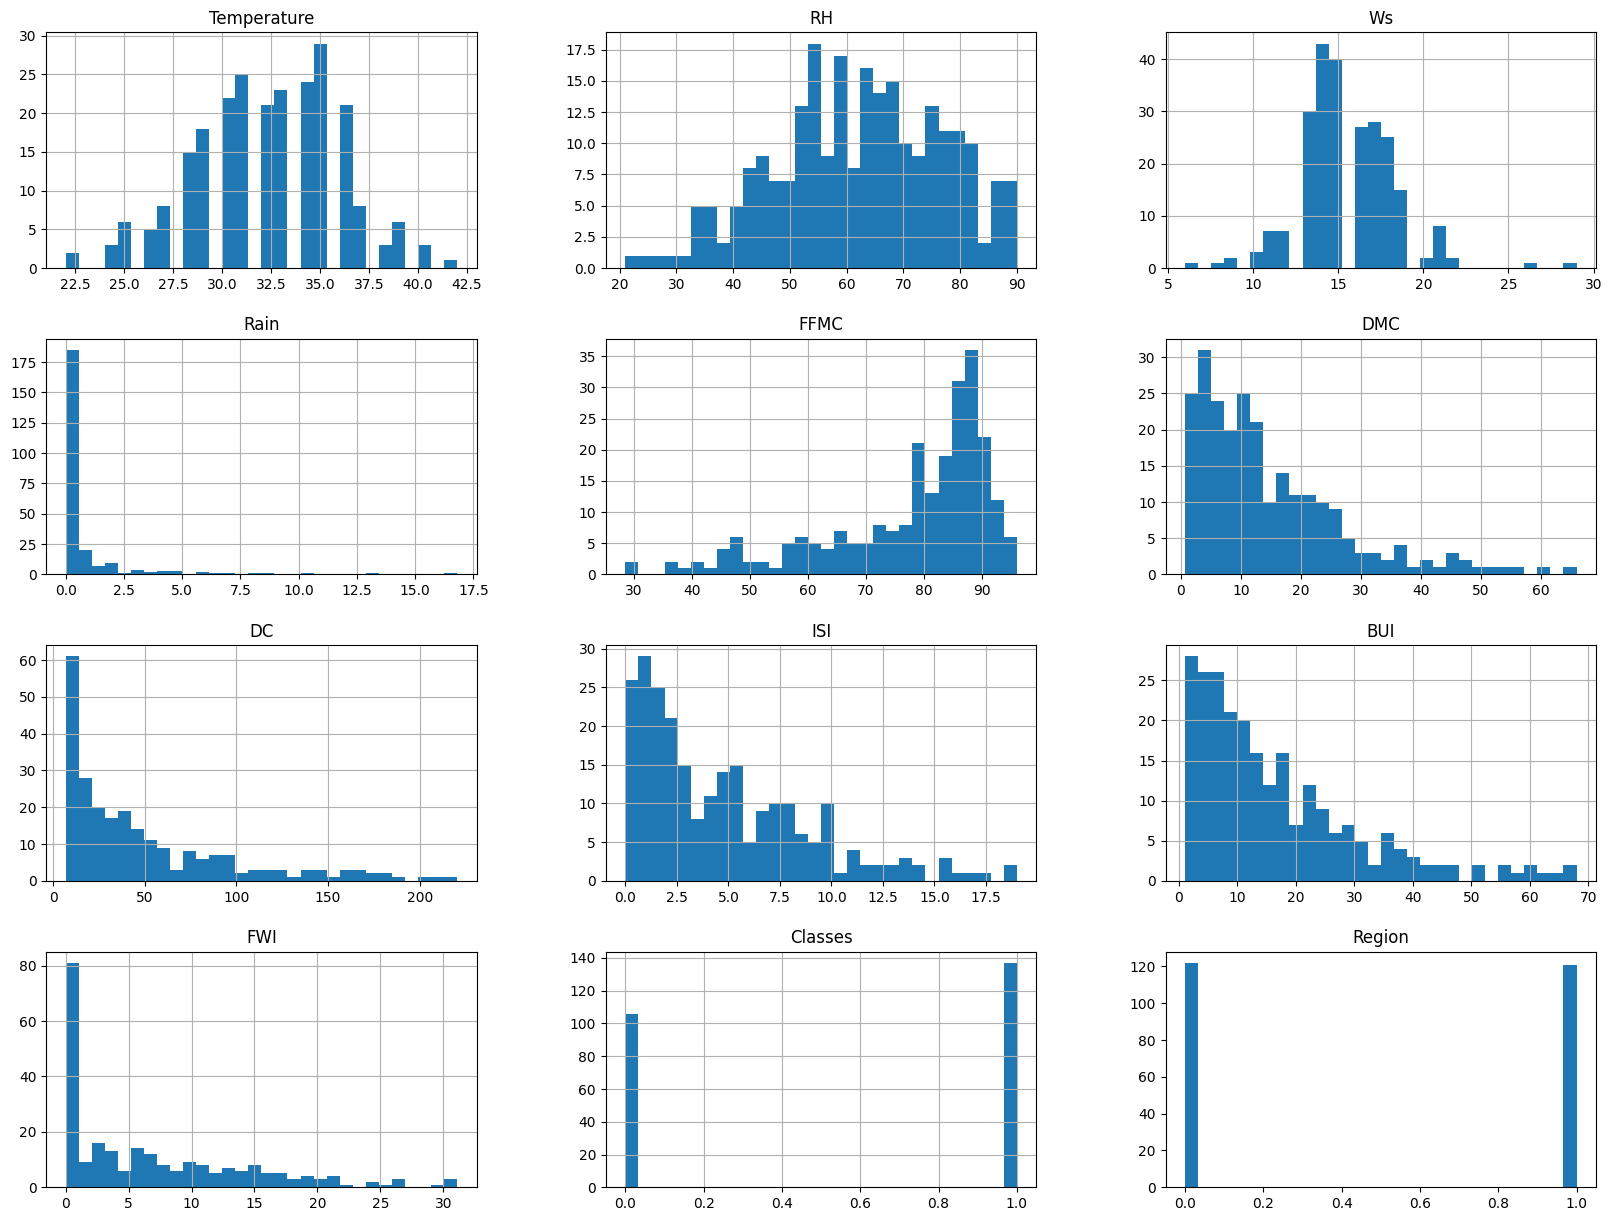

In [31]:
df_plotdata = df_copy.copy()
df_plotdata.drop(columns=["day", "month", "year"], inplace=True)
df_plotdata.hist(figsize = (20,15), bins = 30)
plt.grid()
plt.show()

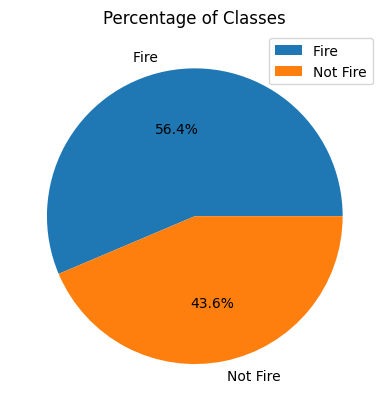

In [32]:
#Calculating the percentage of Fire and Not Fire
percentage = df_plotdata["Classes"].value_counts(normalize=True)*100
values = ["Fire ", "Not Fire"]

plt.pie(percentage, labels = values, autopct='%1.1f%%')
plt.title("Percentage of Classes")
plt.legend()
plt.show()

In [33]:
#Correlation
df_plotdata.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


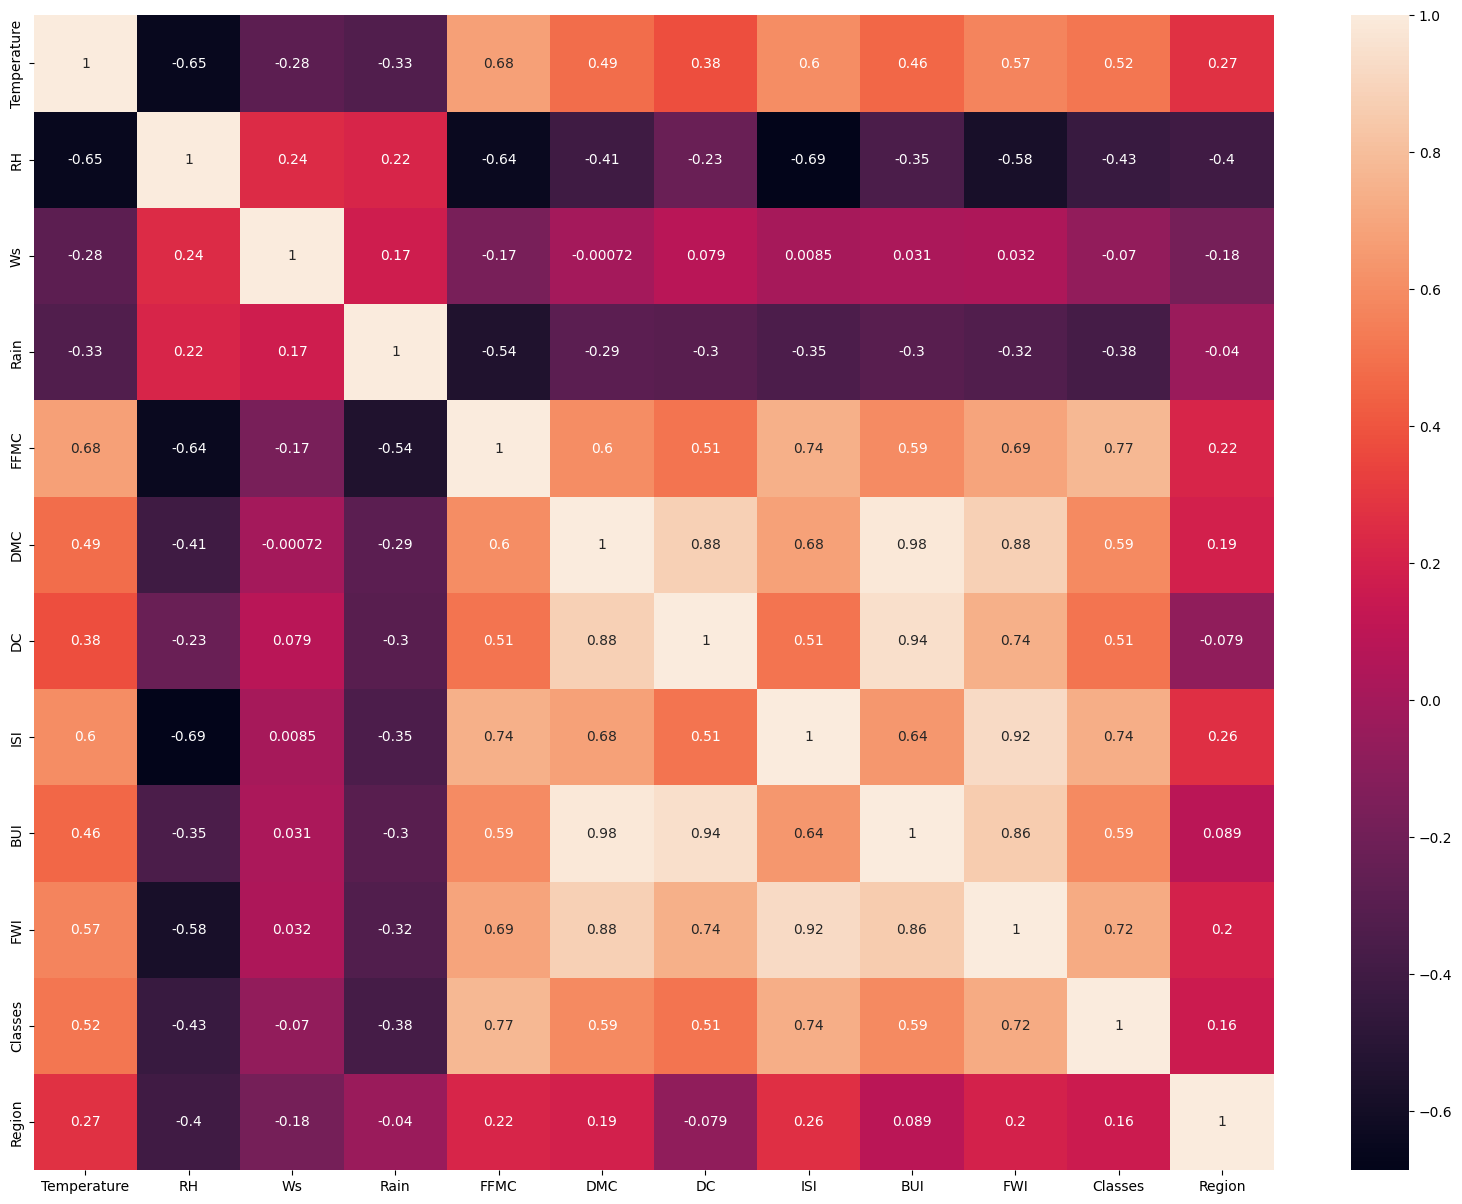

In [34]:
plt.figure(figsize = (20,15))
sns.heatmap(df_plotdata.corr(), annot=True)
plt.show()

<Axes: ylabel='FWI'>

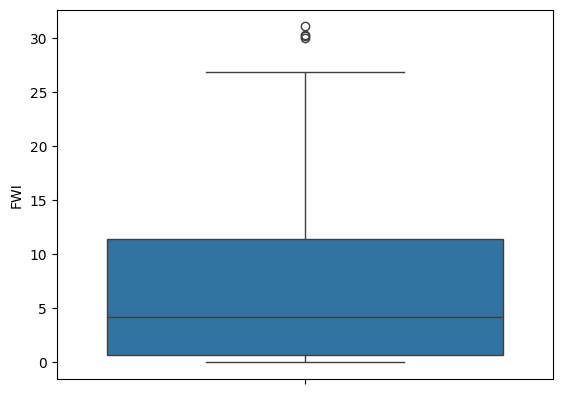

In [35]:
sns.boxplot(df_plotdata["FWI"])

In [36]:
from datetime import datetime, date

df_copy["month"] = pd.to_datetime(df_copy["month"], format = "%m").dt.strftime("%b")
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,Jun,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,Jun,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,Jun,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,Jun,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,Jun,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,Sep,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,Sep,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,Sep,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,Sep,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


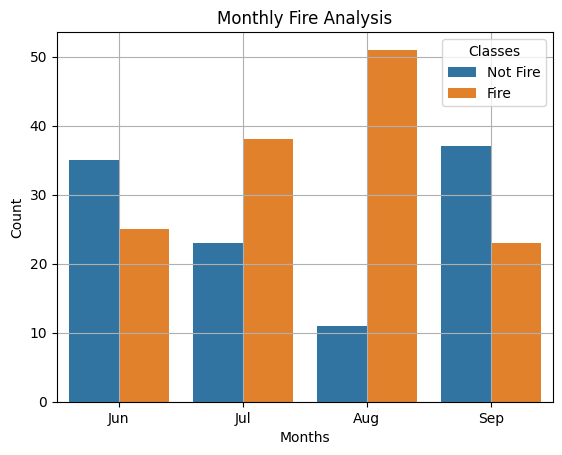

In [37]:
#Monthly Fire Analysis
df_copy["Classes"] = np.where(df_copy["Classes"]==0,"Not Fire", "Fire")
sns.countplot(x="month", hue="Classes",data= df_copy)
plt.ylabel("Count")
plt.xlabel("Months")
plt.title("Monthly Fire Analysis")
plt.grid()
plt.show()

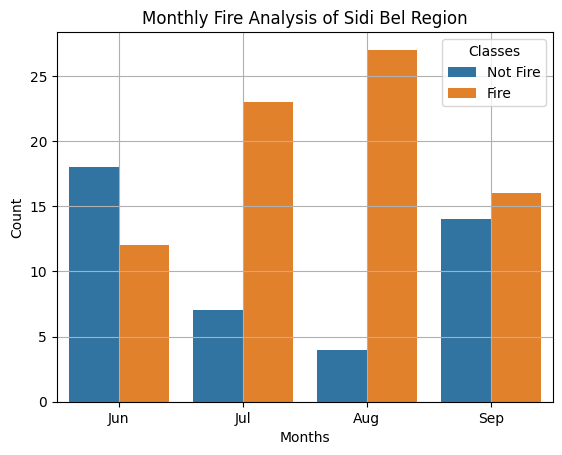

In [38]:
#Monthly Data Analysis of Sidi Bel Region
df_sidi_bel = df_copy[df_copy["Region"]==1]
sns.countplot(x="month", hue="Classes",data= df_sidi_bel)
plt.ylabel("Count")
plt.xlabel("Months")
plt.title("Monthly Fire Analysis of Sidi Bel Region")
plt.grid()
plt.show()

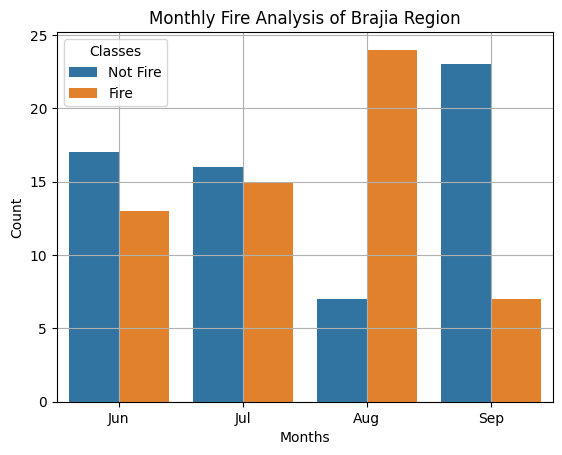

In [39]:
#Monthly Data Analysis of Brajia Region
df_brajia = df_copy[df_copy["Region"]==0]
sns.countplot(x="month", hue="Classes",data= df_brajia)
plt.ylabel("Count")
plt.xlabel("Months")
plt.title("Monthly Fire Analysis of Brajia Region")
plt.grid()
plt.show()

August and July had the Highest number of Fires in both the region. 

**Model Training**

In [40]:
df_model_training = df_copy.copy()
df_model_training = df_model_training.drop(columns=["day", "month", "year"])
df_model_training["Classes"] = np.where(df_model_training["Classes"] == "Not Fire",0,1)
df_model_training

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


**Dependent Feature = FWI

In [41]:
x = df_model_training.drop(columns = "FWI")
y = df_model_training["FWI"]

In [42]:
#Train Test Split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

             Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.656095 -0.305977 -0.317512  0.694768  0.498173   
RH             -0.656095  1.000000  0.225736  0.241656 -0.653023 -0.414601   
Ws             -0.305977  0.225736  1.000000  0.251932 -0.190076  0.000379   
Rain           -0.317512  0.241656  0.251932  1.000000 -0.545491 -0.289754   
FFMC            0.694768 -0.653023 -0.190076 -0.545491  1.000000  0.620807   
DMC             0.498173 -0.414601  0.000379 -0.289754  0.620807  1.000000   
DC              0.390684 -0.236078  0.096576 -0.302341  0.524101  0.868647   
ISI             0.629848 -0.717804 -0.023558 -0.345707  0.750799  0.685656   
BUI             0.473609 -0.362317  0.035633 -0.300964  0.607210  0.983175   
Classes         0.542141 -0.456876 -0.082570 -0.369357  0.781259  0.617273   
Region          0.254549 -0.394665 -0.199969 -0.059022  0.249514  0.212582   

                   DC       ISI       BUI   Classes    Region  

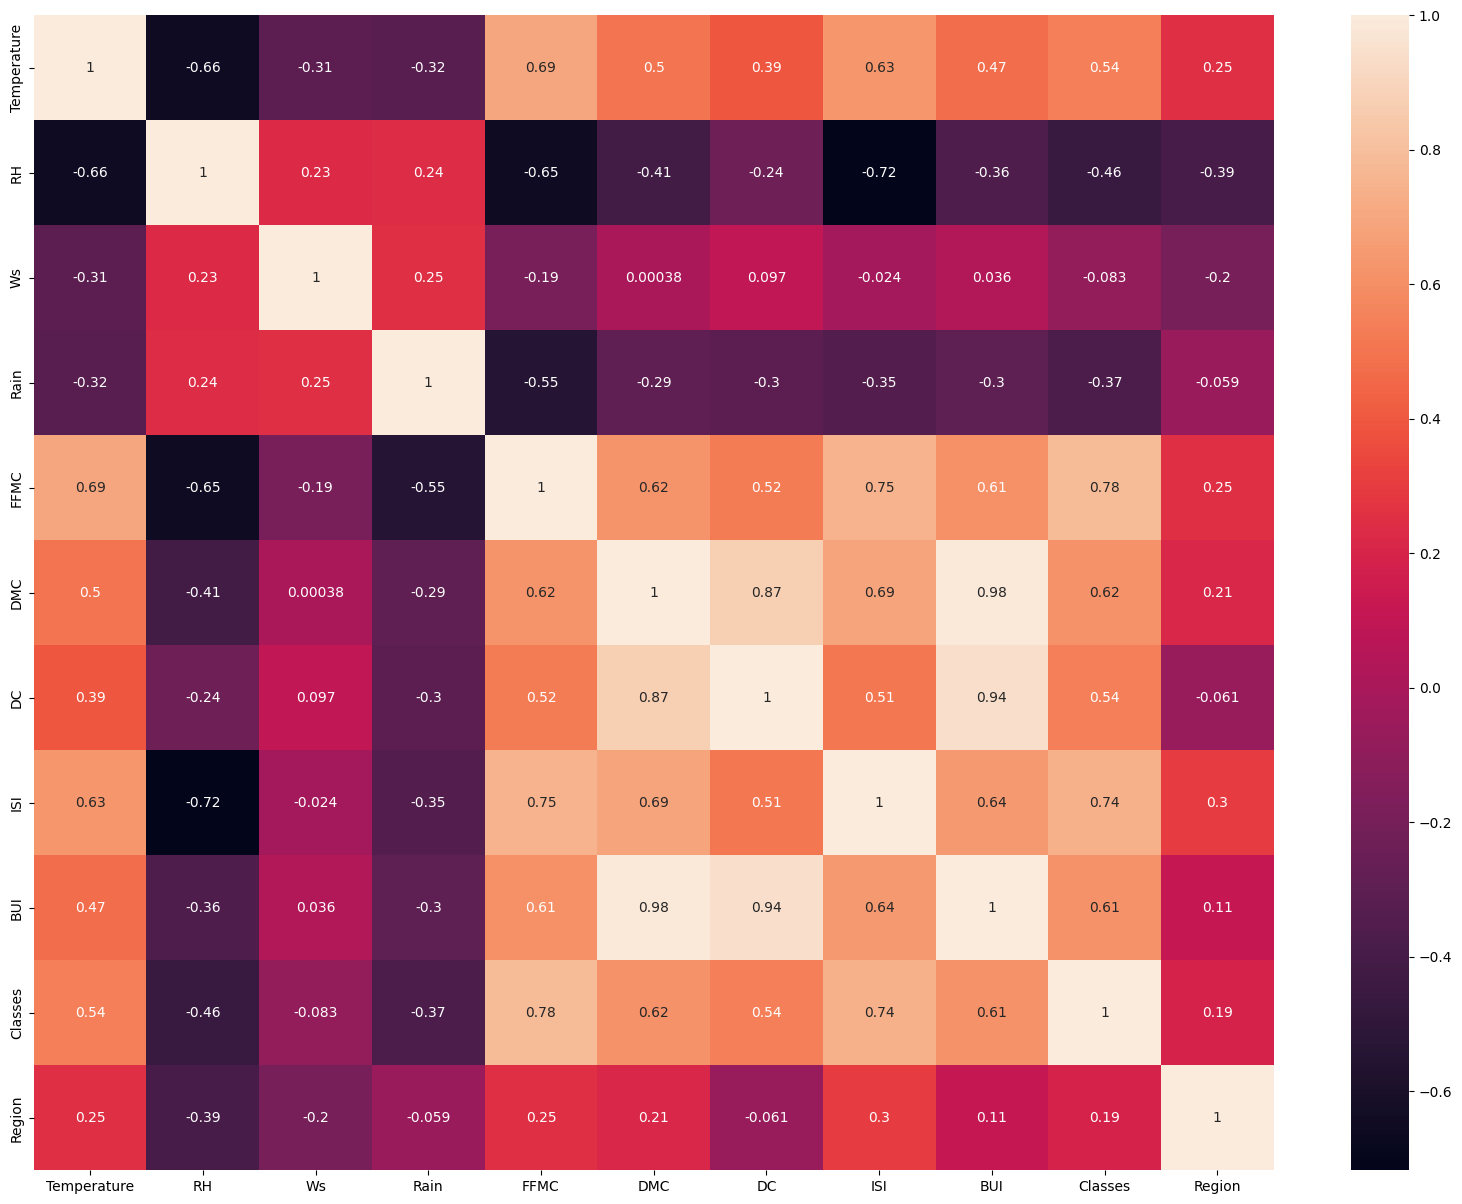

In [43]:
print(x_train.corr())
plt.figure(figsize=(20,15))
sns.heatmap(x_train.corr(), annot=True)
plt.show()

In [44]:
#Checking for Multicolinearity
def multicollinearity(dataset,threshold):
    columns = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[j]
                if colname not in columns:
                    columns.append(colname)
    return columns

In [45]:
multicollinear_features = multicollinearity(x_train,0.85)

In [46]:
#Drop these Feature

x_train.drop(columns = multicollinear_features,  inplace = True)
x_test.drop(columns = multicollinear_features,  inplace = True)

In [47]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


##Standardisation

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

Text(0.5, 1.0, 'X_train After Scaling')

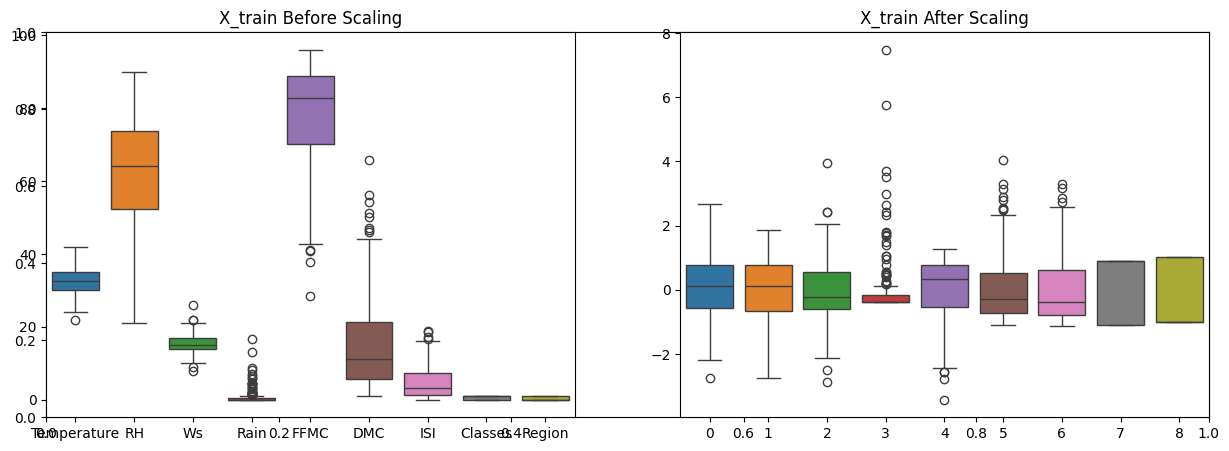

In [49]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train After Scaling')

##LINEAR REGRESSION

Text(0.5, 1.0, 'Scatter plot for Residual vs Predicted data for Testing model')

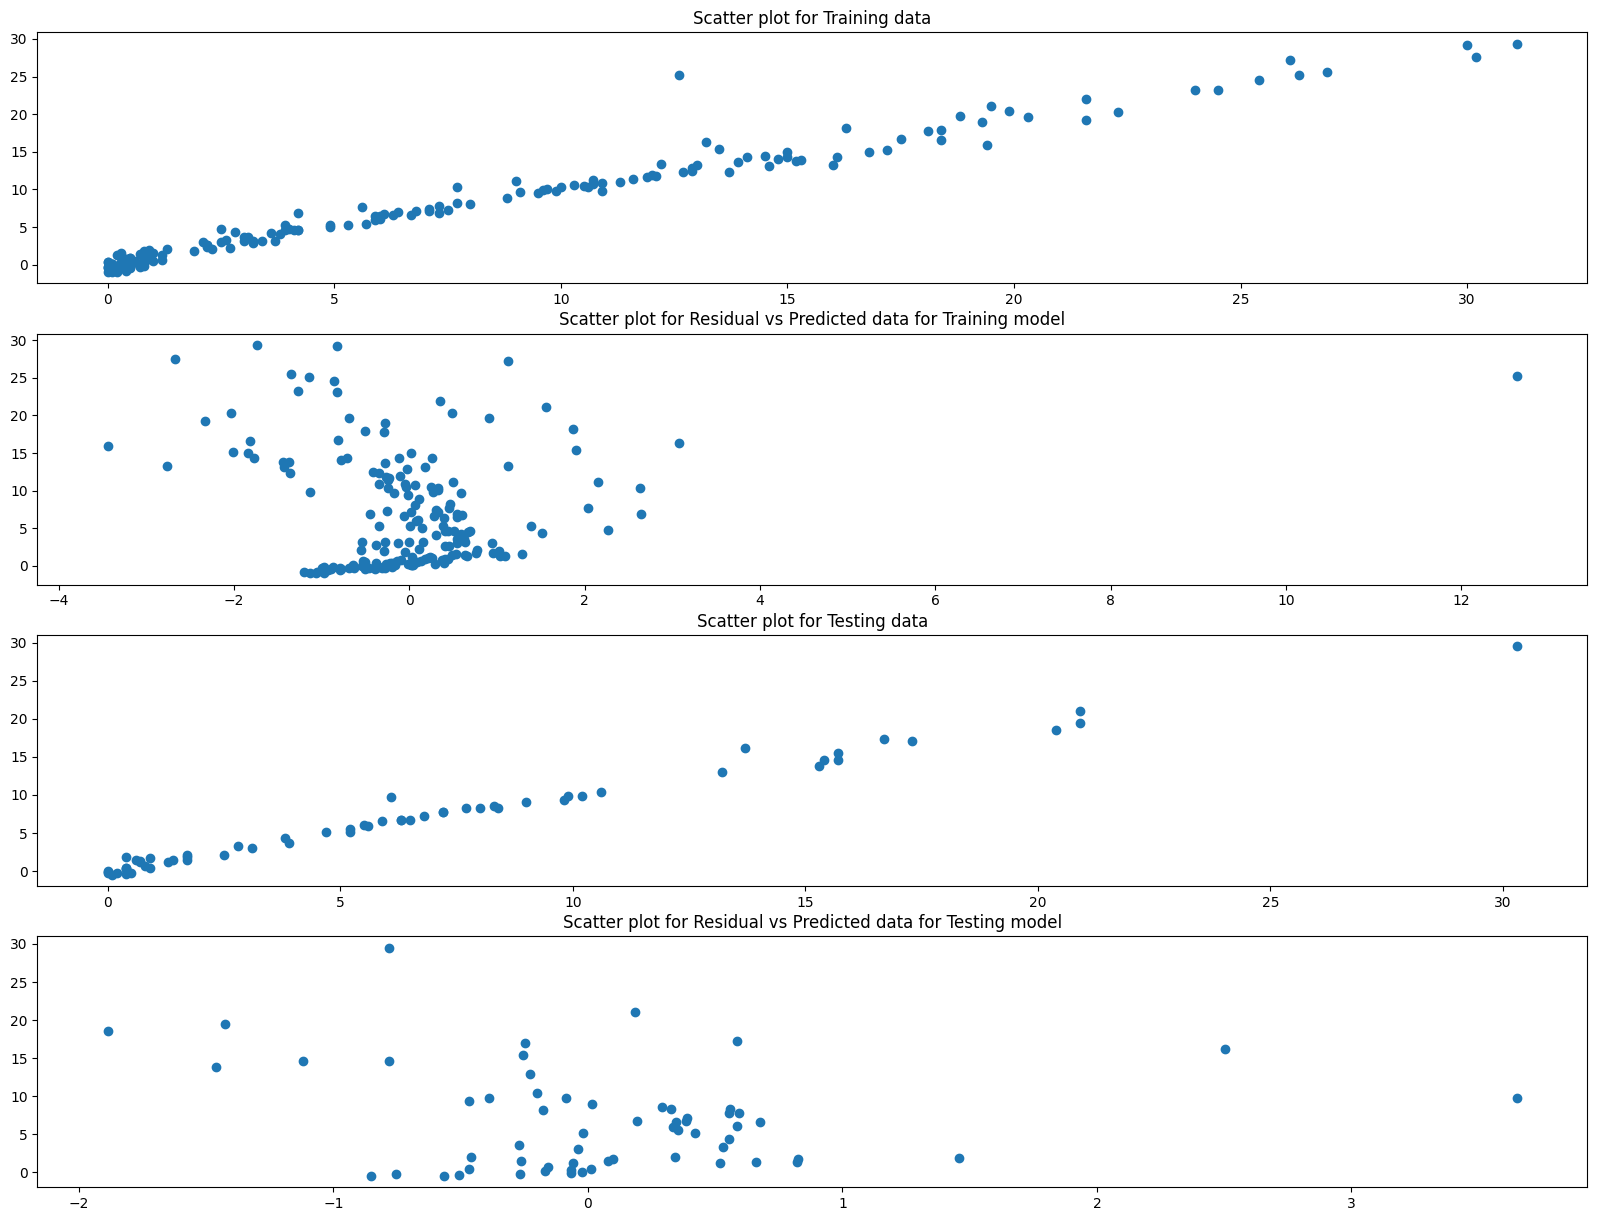

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)
y_train_pred = linreg.predict(x_train_scaled)
y_test_pred = linreg.predict(x_test_scaled)
resid_train = y_train_pred - y_train
resid_test = y_test_pred - y_test

rmse_test = root_mean_squared_error(y_test,y_test_pred)
score_test = r2_score(y_test,y_test_pred)

rmse_train = root_mean_squared_error(y_train,y_train_pred)
score_train = r2_score(y_train,y_train_pred)


fig=plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.scatter(y_train,y_train_pred)
plt.title("Scatter plot for Training data")

plt.subplot(4,1,2)
plt.scatter(resid_train,y_train_pred)
plt.title("Scatter plot for Residual vs Predicted data for Training model") #Checking for Homoskedaticity

plt.subplot(4,1,3)
plt.scatter(y_test,y_test_pred)
plt.title("Scatter plot for Testing data")

plt.subplot(4,1,4)
plt.scatter(resid_test,y_test_pred)
plt.title("Scatter plot for Residual vs Predicted data for Testing model")

In [51]:
print(f"Root mean squared error for Linear Regression Test model is {rmse_test}")
print(f"Root mean squared error for Linear Regression Train model is {rmse_train}")

Root mean squared error for Linear Regression Test model is 0.8211435242265253
Root mean squared error for Linear Regression Train model is 1.3292995095904339


In [52]:
print(f"R square for Linear Regression Test model is {score_test}")
print(f"R square for Linear Regression Train model is {score_train}")

R square for Linear Regression Test model is 0.9847657384266951
R square for Linear Regression Train model is 0.969907766275777


##Lasso Model

Text(0.5, 1.0, 'Scatter plot for Residual vs Predicted data for Testing model')

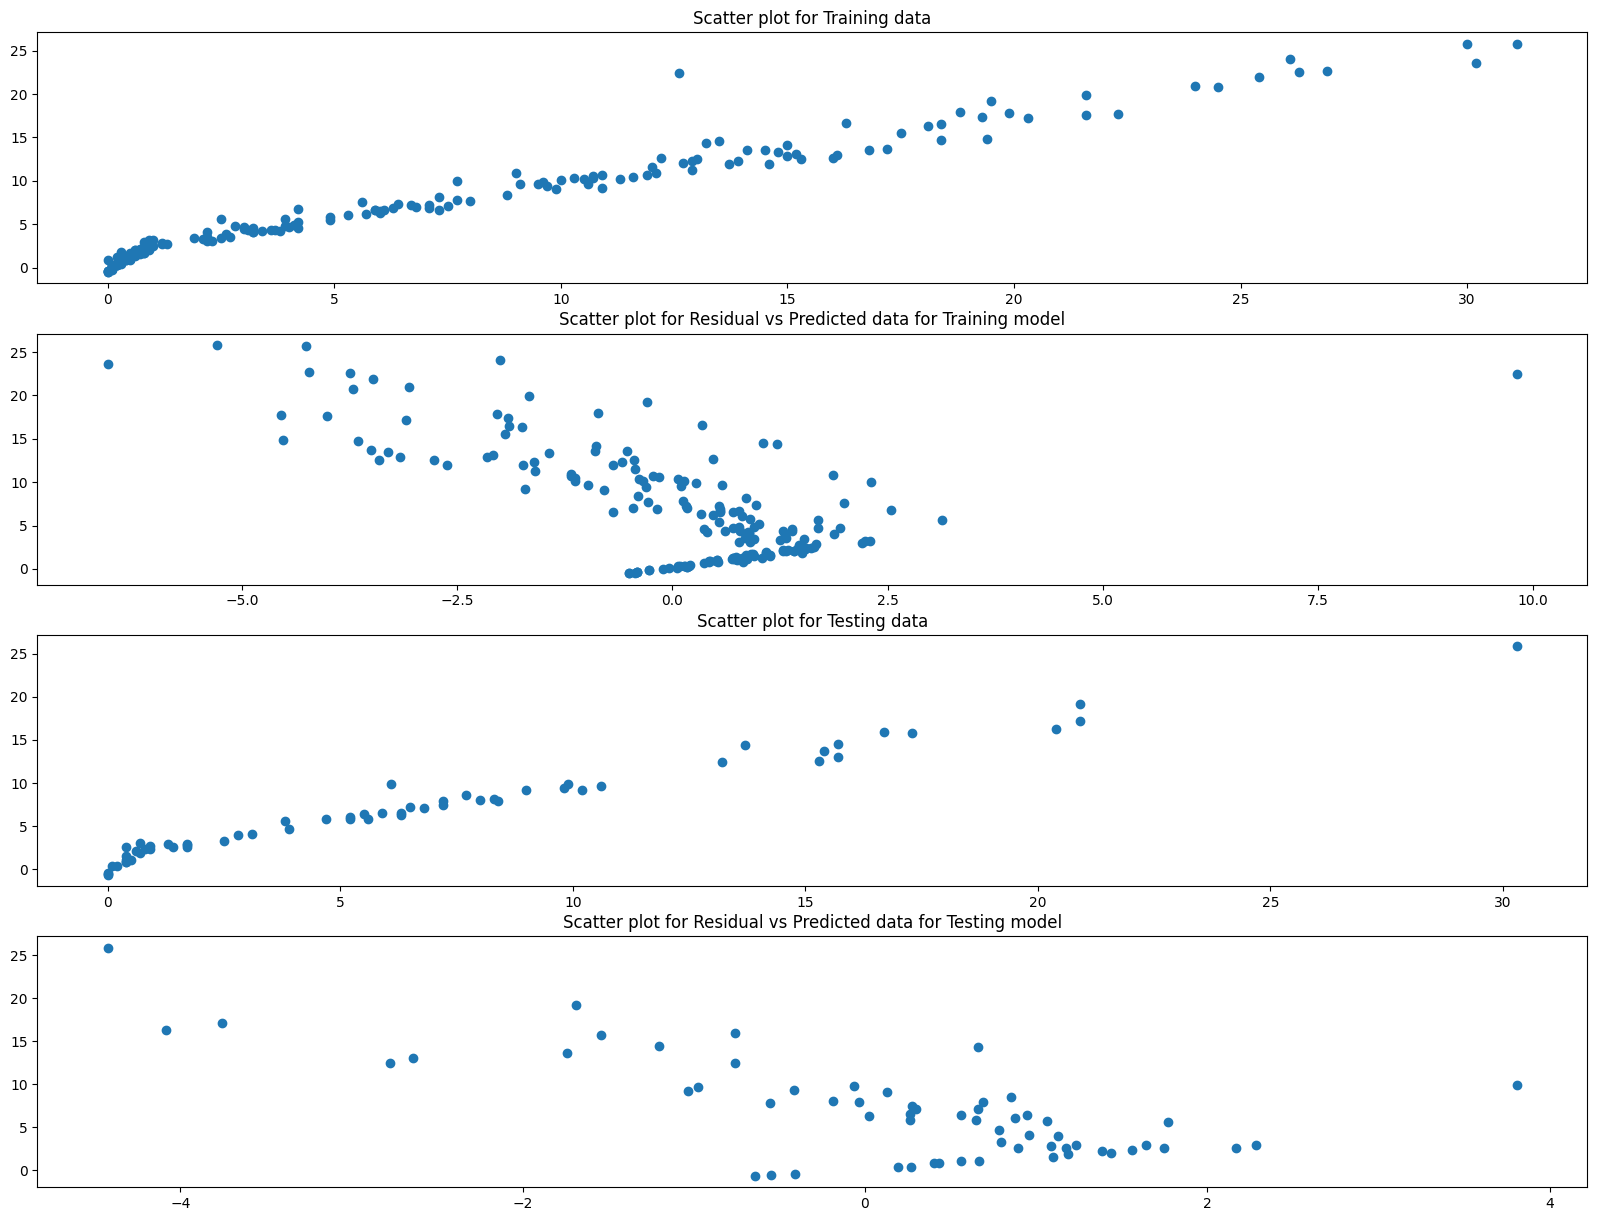

In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_train_pred_lasso = lasso.predict(x_train_scaled)
y_test_pred_lasso = lasso.predict(x_test_scaled)
resid_train_lasso = y_train_pred_lasso - y_train
resid_test_lasso = y_test_pred_lasso - y_test

rmse_test_lasso = root_mean_squared_error(y_test,y_test_pred_lasso)
score_test_lasso = r2_score(y_test,y_test_pred_lasso)

rmse_train_lasso = root_mean_squared_error(y_train,y_train_pred_lasso)
score_train_lasso = r2_score(y_train,y_train_pred_lasso)


fig=plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.scatter(y_train,y_train_pred_lasso)
plt.title("Scatter plot for Training data")

plt.subplot(4,1,2)
plt.scatter(resid_train_lasso,y_train_pred_lasso)
plt.title("Scatter plot for Residual vs Predicted data for Training model")

plt.subplot(4,1,3)
plt.scatter(y_test,y_test_pred_lasso)
plt.title("Scatter plot for Testing data")

plt.subplot(4,1,4)
plt.scatter(resid_test_lasso,y_test_pred_lasso)
plt.title("Scatter plot for Residual vs Predicted data for Testing model")

In [54]:
print(f"Root mean squared error for Lasso Regression Test model is {rmse_test_lasso}")
print(f"Root mean squared error for Lasso Regression Train model is {rmse_train_lasso}")

Root mean squared error for Lasso Regression Test model is 1.4994485292591664
Root mean squared error for Lasso Regression Train model is 1.8113777008301737


In [55]:
print(f"R square for Lasso Regression Test model is {score_test_lasso}")
print(f"R square for Lasso Regression Train model is {score_train_lasso}")

R square for Lasso Regression Test model is 0.9492020263112388
R square for Lasso Regression Train model is 0.9441238118261989


##Ridge Model

Text(0.5, 1.0, 'Scatter plot for Residual vs Predicted data for Testing model')

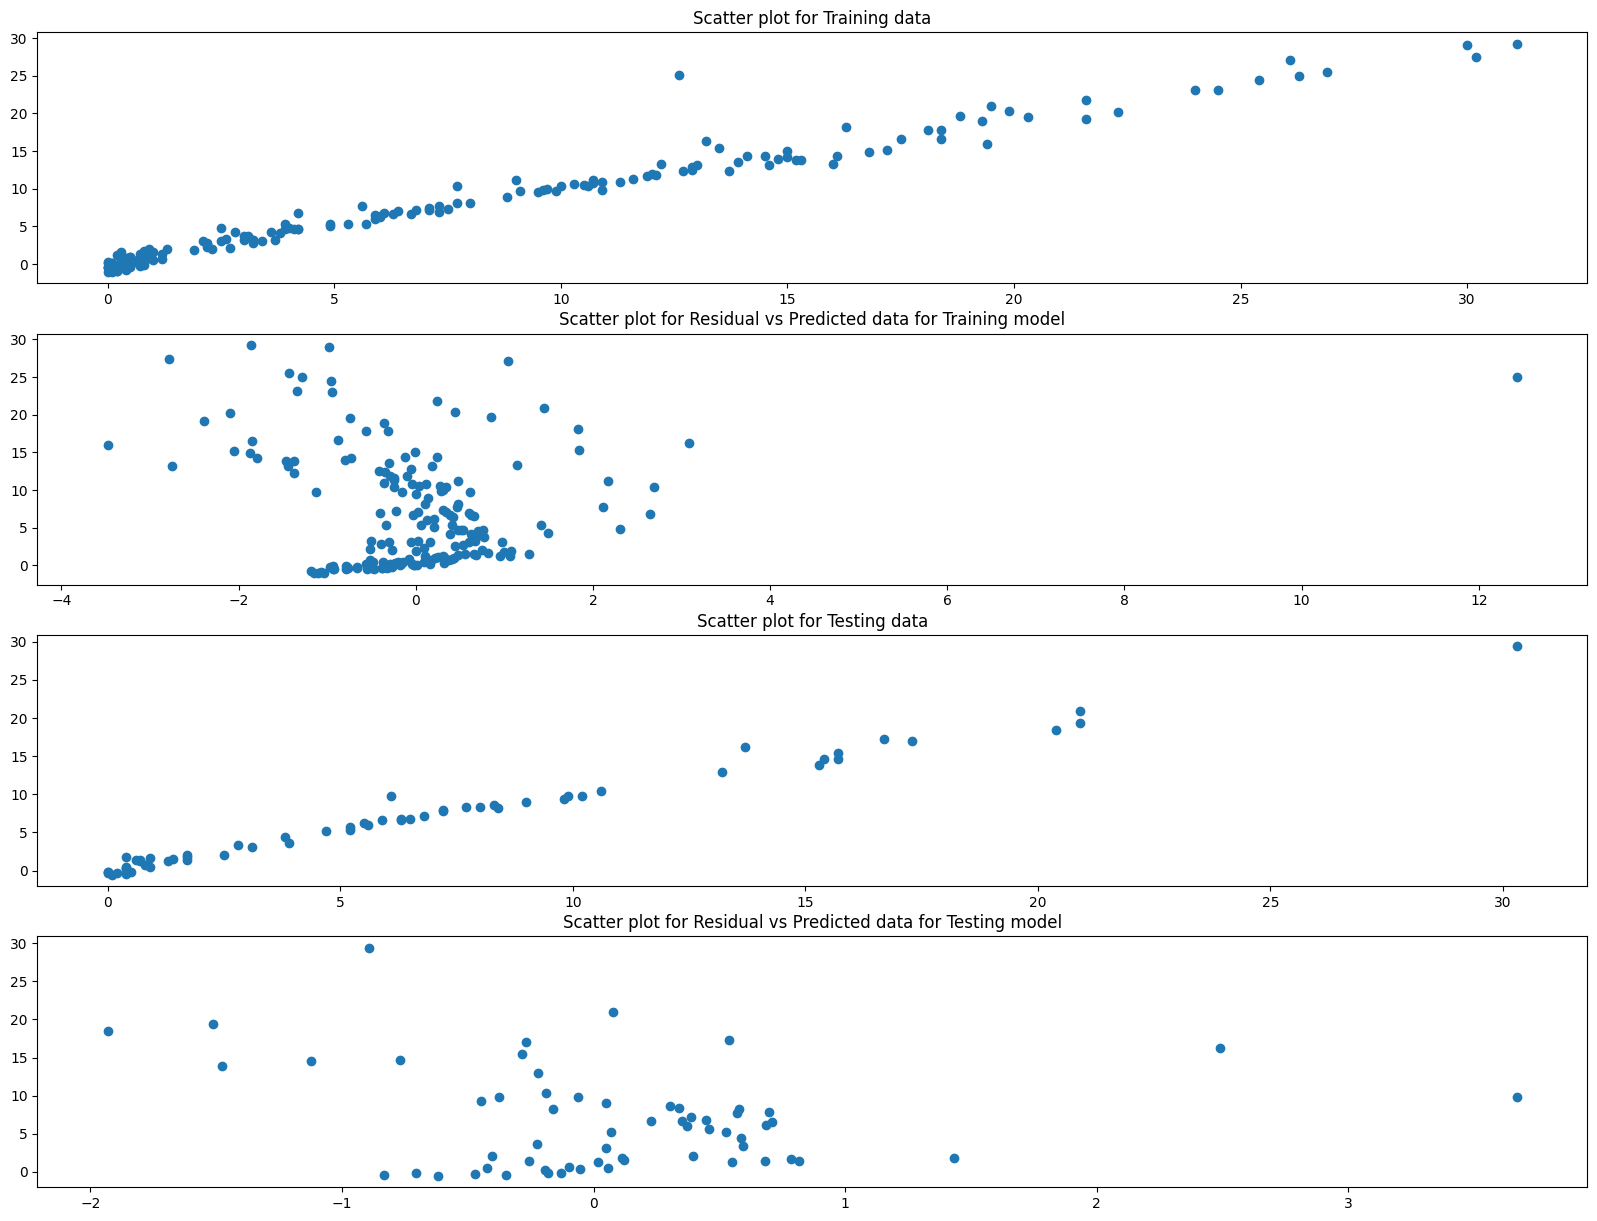

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_train_pred_ridge = ridge.predict(x_train_scaled)
y_test_pred_ridge = ridge.predict(x_test_scaled)
resid_train_ridge = y_train_pred_ridge - y_train
resid_test_ridge = y_test_pred_ridge - y_test

rmse_test_ridge = root_mean_squared_error(y_test,y_test_pred_ridge)
score_test_ridge = r2_score(y_test,y_test_pred_ridge)

rmse_train_ridge = root_mean_squared_error(y_train,y_train_pred_ridge)
score_train_ridge = r2_score(y_train,y_train_pred_ridge)


fig=plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.scatter(y_train,y_train_pred_ridge)
plt.title("Scatter plot for Training data")

plt.subplot(4,1,2)
plt.scatter(resid_train_ridge,y_train_pred_ridge)
plt.title("Scatter plot for Residual vs Predicted data for Training model")

plt.subplot(4,1,3)
plt.scatter(y_test,y_test_pred_ridge)
plt.title("Scatter plot for Testing data")

plt.subplot(4,1,4)
plt.scatter(resid_test_ridge,y_test_pred_ridge)
plt.title("Scatter plot for Residual vs Predicted data for Testing model")

In [57]:
print(f"Root mean squared error for Ridge Regression Test model is {rmse_test_ridge}")
print(f"Root mean squared error for Ridge Regression Train model is {rmse_train_ridge}")

Root mean squared error for Ridge Regression Test model is 0.8336185529456561
Root mean squared error for Ridge Regression Train model is 1.3303811072807534


In [58]:
print(f"R square for Ridge Regression Test model is {score_test_ridge}")
print(f"R square for Ridge Regression Train model is {score_train_ridge}")

R square for Ridge Regression Test model is 0.9842993364555512
R square for Ridge Regression Train model is 0.9698587766663882


##ElasticNet

Text(0.5, 1.0, 'Scatter plot for Residual vs Predicted data for Testing model')

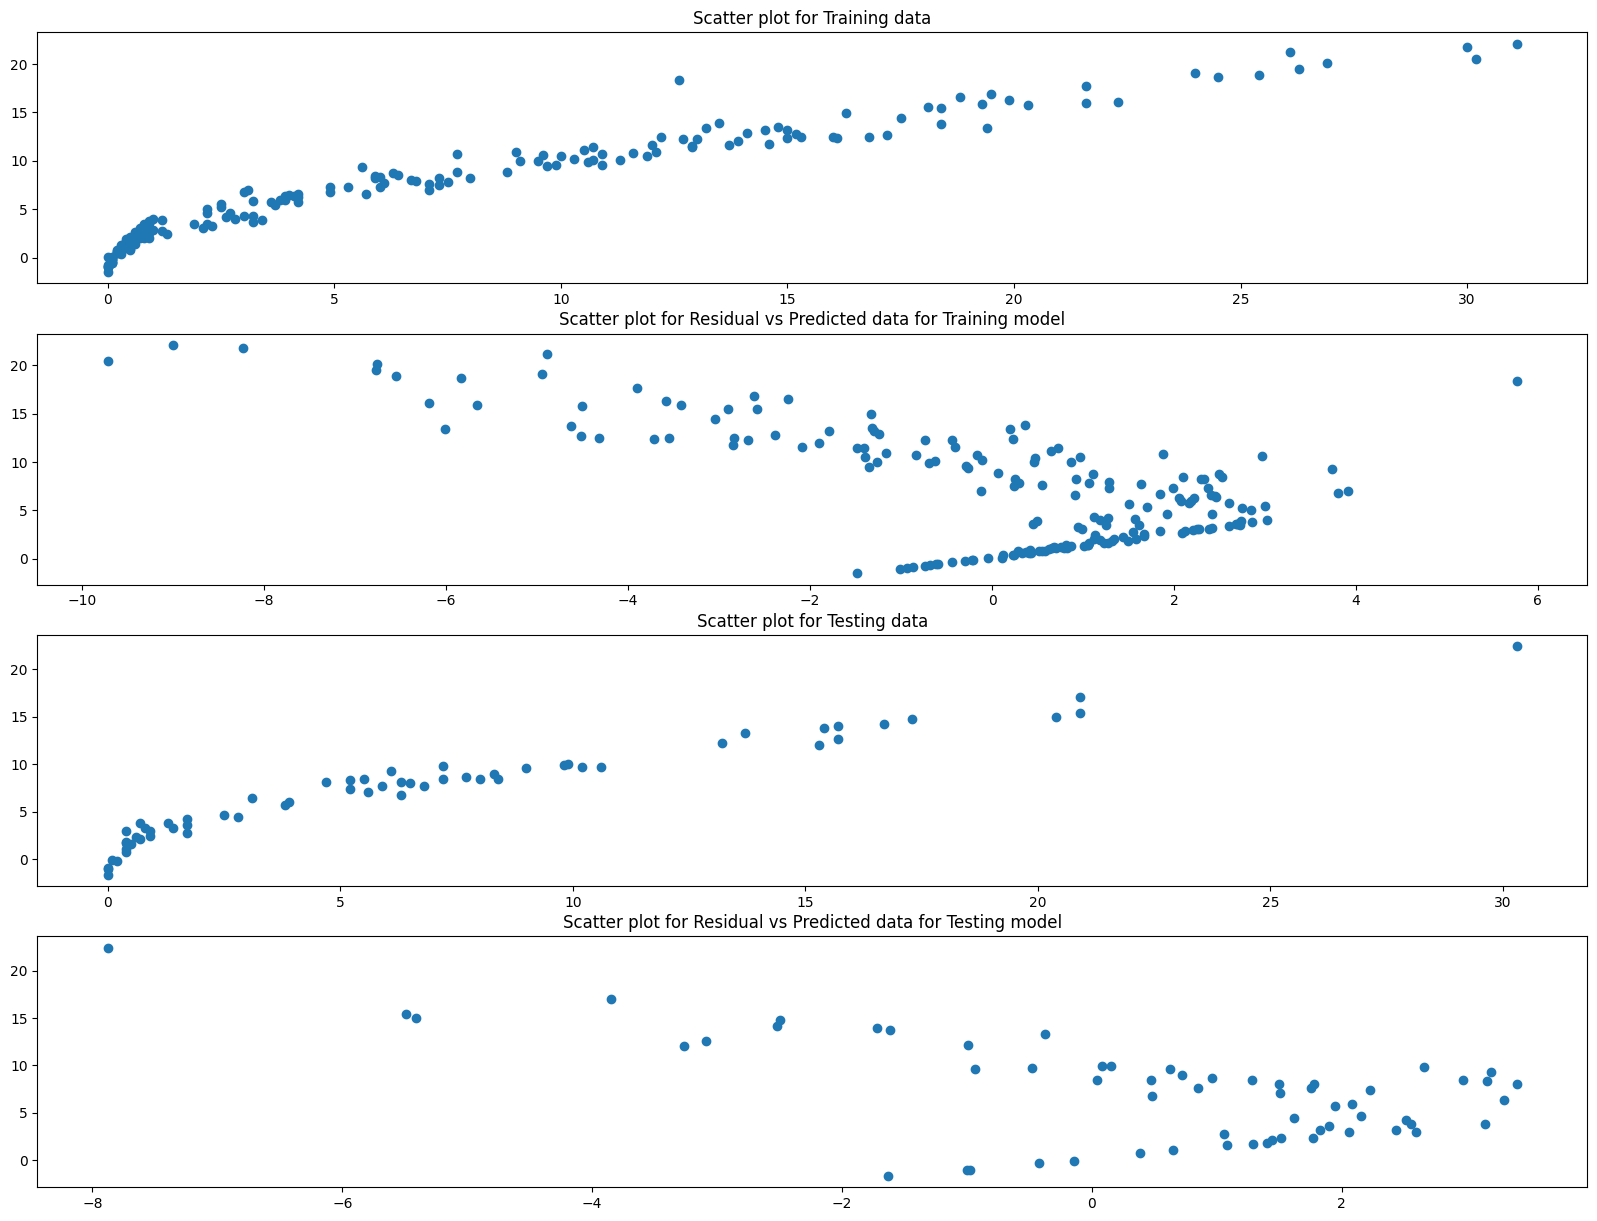

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled, y_train)
y_train_pred_elasticnet = elasticnet.predict(x_train_scaled)
y_test_pred_elasticnet = elasticnet.predict(x_test_scaled)
resid_train_elasticnet = y_train_pred_elasticnet - y_train
resid_test_elasticnet = y_test_pred_elasticnet - y_test

rmse_test_elasticnet = root_mean_squared_error(y_test,y_test_pred_elasticnet)
score_test_elasticnet = r2_score(y_test,y_test_pred_elasticnet)

rmse_train_elasticnet = root_mean_squared_error(y_train,y_train_pred_elasticnet)
score_train_elasticnet = r2_score(y_train,y_train_pred_elasticnet)


fig=plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.scatter(y_train,y_train_pred_elasticnet)
plt.title("Scatter plot for Training data")

plt.subplot(4,1,2)
plt.scatter(resid_train_elasticnet,y_train_pred_elasticnet)
plt.title("Scatter plot for Residual vs Predicted data for Training model")

plt.subplot(4,1,3)
plt.scatter(y_test,y_test_pred_elasticnet)
plt.title("Scatter plot for Testing data")

plt.subplot(4,1,4)
plt.scatter(resid_test_elasticnet,y_test_pred_elasticnet)
plt.title("Scatter plot for Residual vs Predicted data for Testing model")

In [60]:
print(f"Root mean squared error for ElasticNet Regression Test model is {rmse_test_elasticnet}")
print(f"Root mean squared error for ElasticNet Regression Train model is {rmse_train_elasticnet}")

Root mean squared error for ElasticNet Regression Test model is 2.3488829474933874
Root mean squared error for ElasticNet Regression Train model is 2.5575609526311824


In [61]:
print(f"R squared for ElasticNet Regression Test model is {score_test_elasticnet}")
print(f"R squared for ElasticNet Regression Train model is {score_train_elasticnet}")

R squared for ElasticNet Regression Test model is 0.8753460589519703
R squared for ElasticNet Regression Train model is 0.8886062760838327


**Hyperparameter Tuning and Cross Validation**

##Lasso CV

Text(0.5, 1.0, 'Scatter plot for Residual vs Predicted data for Testing model')

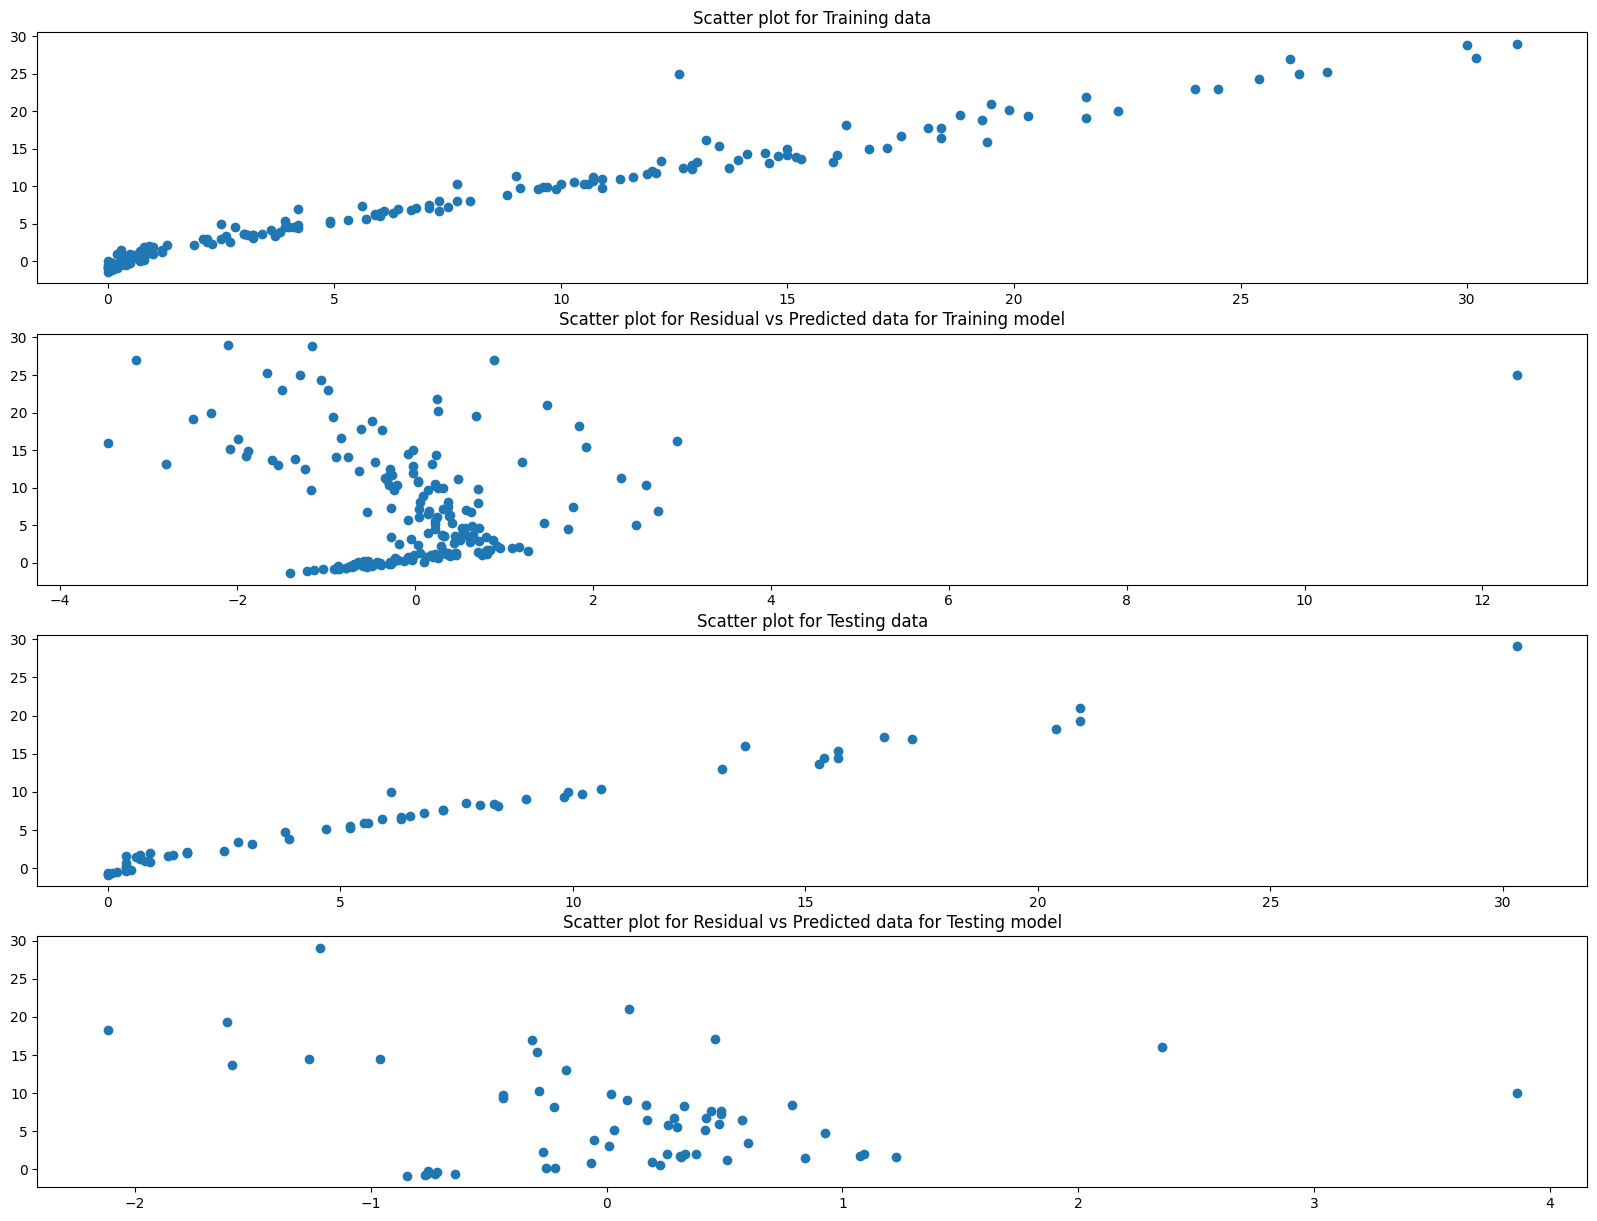

In [62]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

lassocv = LassoCV()
lassocv.fit(x_train_scaled, y_train)
y_train_pred_lassocv = lassocv.predict(x_train_scaled)
y_test_pred_lassocv = lassocv.predict(x_test_scaled)
resid_train_lassocv = y_train_pred_lassocv - y_train
resid_test_lassocv = y_test_pred_lassocv - y_test

rmse_test_lassocv = root_mean_squared_error(y_test,y_test_pred_lassocv)
score_test_lassocv = r2_score(y_test,y_test_pred_lassocv)

rmse_train_lassocv = root_mean_squared_error(y_train,y_train_pred_lassocv)
score_train_lassocv = r2_score(y_train,y_train_pred_lassocv)


fig=plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.scatter(y_train,y_train_pred_lassocv)
plt.title("Scatter plot for Training data")

plt.subplot(4,1,2)
plt.scatter(resid_train_lassocv,y_train_pred_lassocv)
plt.title("Scatter plot for Residual vs Predicted data for Training model")

plt.subplot(4,1,3)
plt.scatter(y_test,y_test_pred_lassocv)
plt.title("Scatter plot for Testing data")

plt.subplot(4,1,4)
plt.scatter(resid_test_lassocv,y_test_pred_lassocv)
plt.title("Scatter plot for Residual vs Predicted data for Testing model")

In [63]:
lassocv.alpha_ #Alpha used for Lasso Regression

np.float64(0.05725391318234408)

In [64]:
lassocv.alphas_ #All the alphas that were used for cross validation. (100 alphas)

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [65]:
lassocv.mse_path_ #These are the mean squared errors for every cross validation (100 X 5 =500)

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [66]:
print(f"Root mean squared error for LassoCV Regression Test model is {rmse_test_lassocv}")
print(f"Root mean squared error for LassoCV Regression Train model is {rmse_train_lassocv}")

Root mean squared error for LassoCV Regression Test model is 0.8902244410677355
Root mean squared error for LassoCV Regression Train model is 1.349949150871381


In [67]:
print(f"R square for LassoCV Regression Test model is {score_test_lassocv}")
print(f"R square for LassoCV Regression Train model is {score_train_lassocv}")

R square for LassoCV Regression Test model is 0.9820946715928275
R square for LassoCV Regression Train model is 0.9689655854295935


##RidgeCV

Text(0.5, 1.0, 'Scatter plot for Residual vs Predicted data for Testing model')

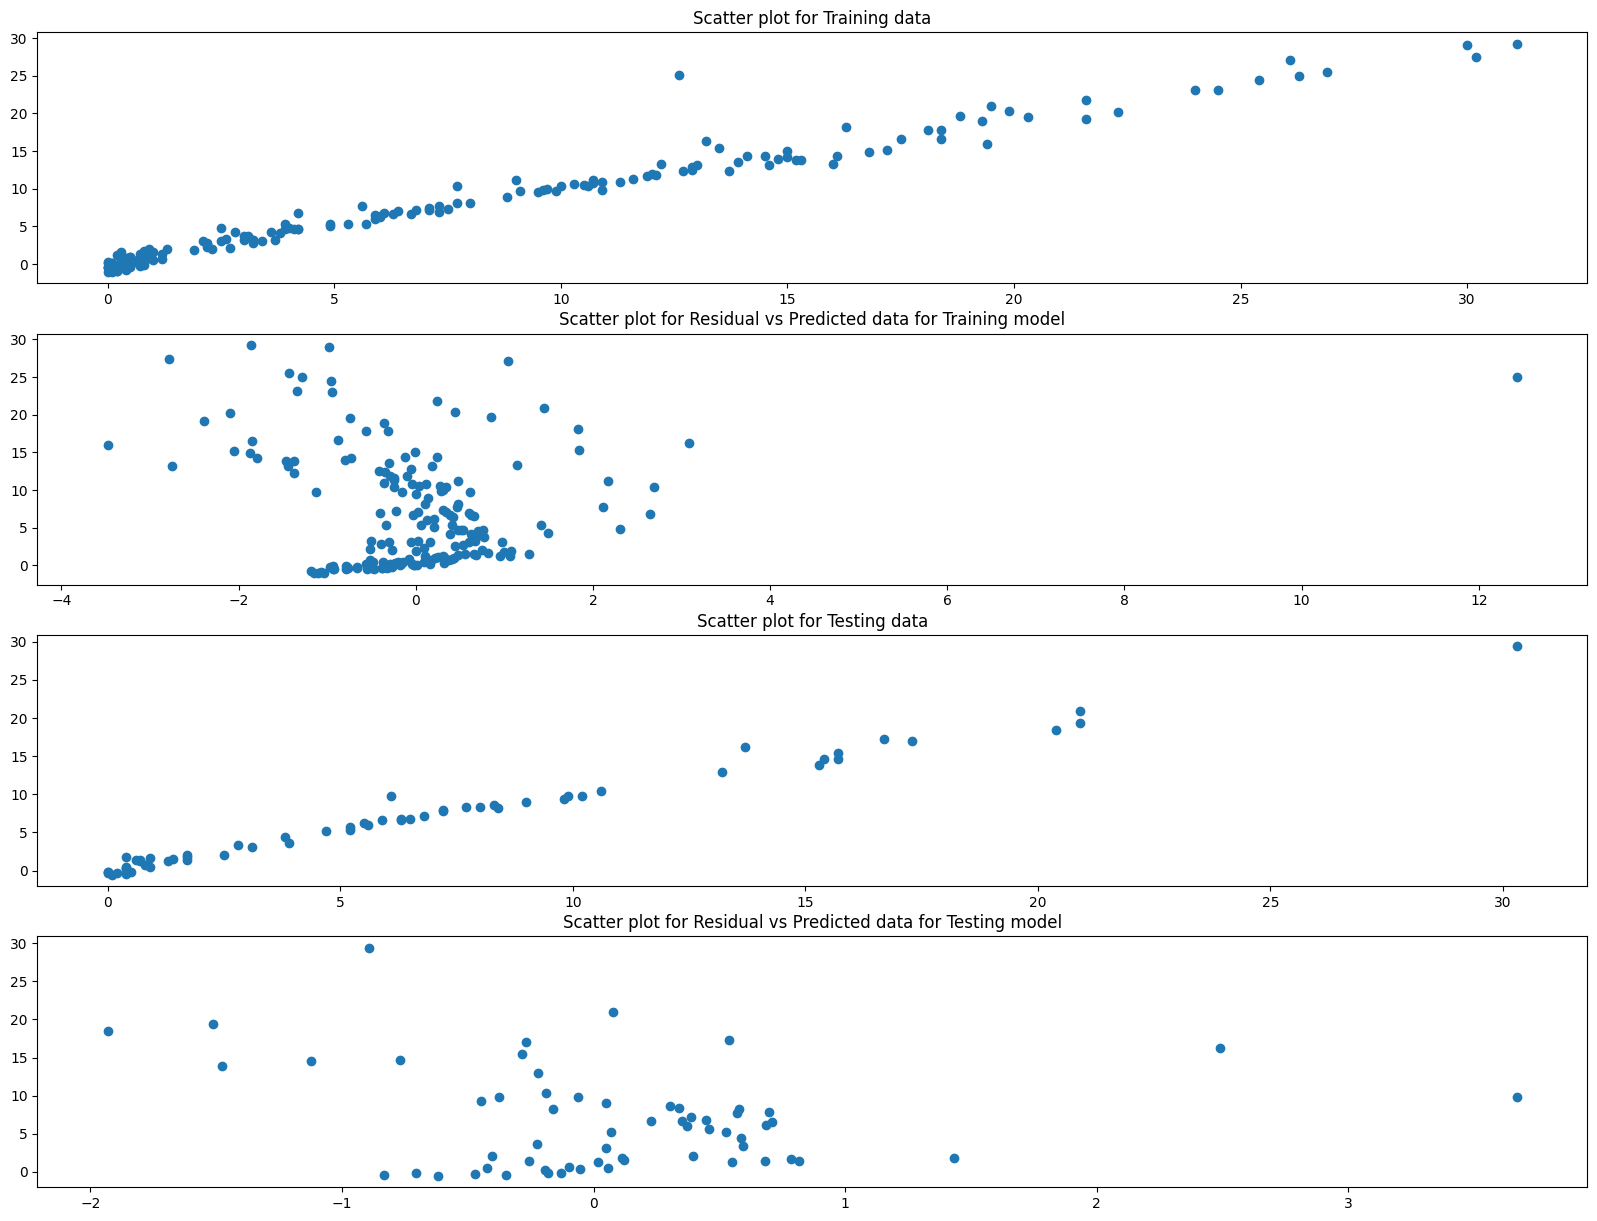

In [68]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

ridgecv = RidgeCV(cv = 5)
ridgecv.fit(x_train_scaled, y_train)
y_train_pred_ridgecv = ridgecv.predict(x_train_scaled)
y_test_pred_ridgecv = ridgecv.predict(x_test_scaled)
resid_train_ridgecv = y_train_pred_ridgecv - y_train
resid_test_ridgecv = y_test_pred_ridgecv - y_test

rmse_test_ridgecv = root_mean_squared_error(y_test,y_test_pred_ridgecv)
score_test_ridgecv = r2_score(y_test,y_test_pred_ridgecv)

rmse_train_ridgecv = root_mean_squared_error(y_train,y_train_pred_ridgecv)
score_train_ridgecv = r2_score(y_train,y_train_pred_ridgecv)


fig=plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.scatter(y_train,y_train_pred_ridgecv)
plt.title("Scatter plot for Training data")

plt.subplot(4,1,2)
plt.scatter(resid_train_ridge,y_train_pred_ridgecv)
plt.title("Scatter plot for Residual vs Predicted data for Training model")

plt.subplot(4,1,3)
plt.scatter(y_test,y_test_pred_ridgecv)
plt.title("Scatter plot for Testing data")

plt.subplot(4,1,4)
plt.scatter(resid_test_ridge,y_test_pred_ridgecv)
plt.title("Scatter plot for Residual vs Predicted data for Testing model")

In [69]:
ridgecv.alpha_

np.float64(1.0)

In [70]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [71]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

In [72]:
print(f"Root mean squared error for RidgeCV Regression Test model is {rmse_test_ridgecv}")
print(f"Root mean squared error for RidgeCV Regression Train model is {rmse_train_ridgecv}")

Root mean squared error for RidgeCV Regression Test model is 0.8336185529456561
Root mean squared error for RidgeCV Regression Train model is 1.3303811072807534


In [73]:
print(f"R square for LassoCV Regression Test model is {score_test_lassocv}")
print(f"R square for LassoCV Regression Train model is {score_train_lassocv}")

R square for LassoCV Regression Test model is 0.9820946715928275
R square for LassoCV Regression Train model is 0.9689655854295935


##ElasticNetCV

Text(0.5, 1.0, 'Scatter plot for Residual vs Predicted data for Testing model')

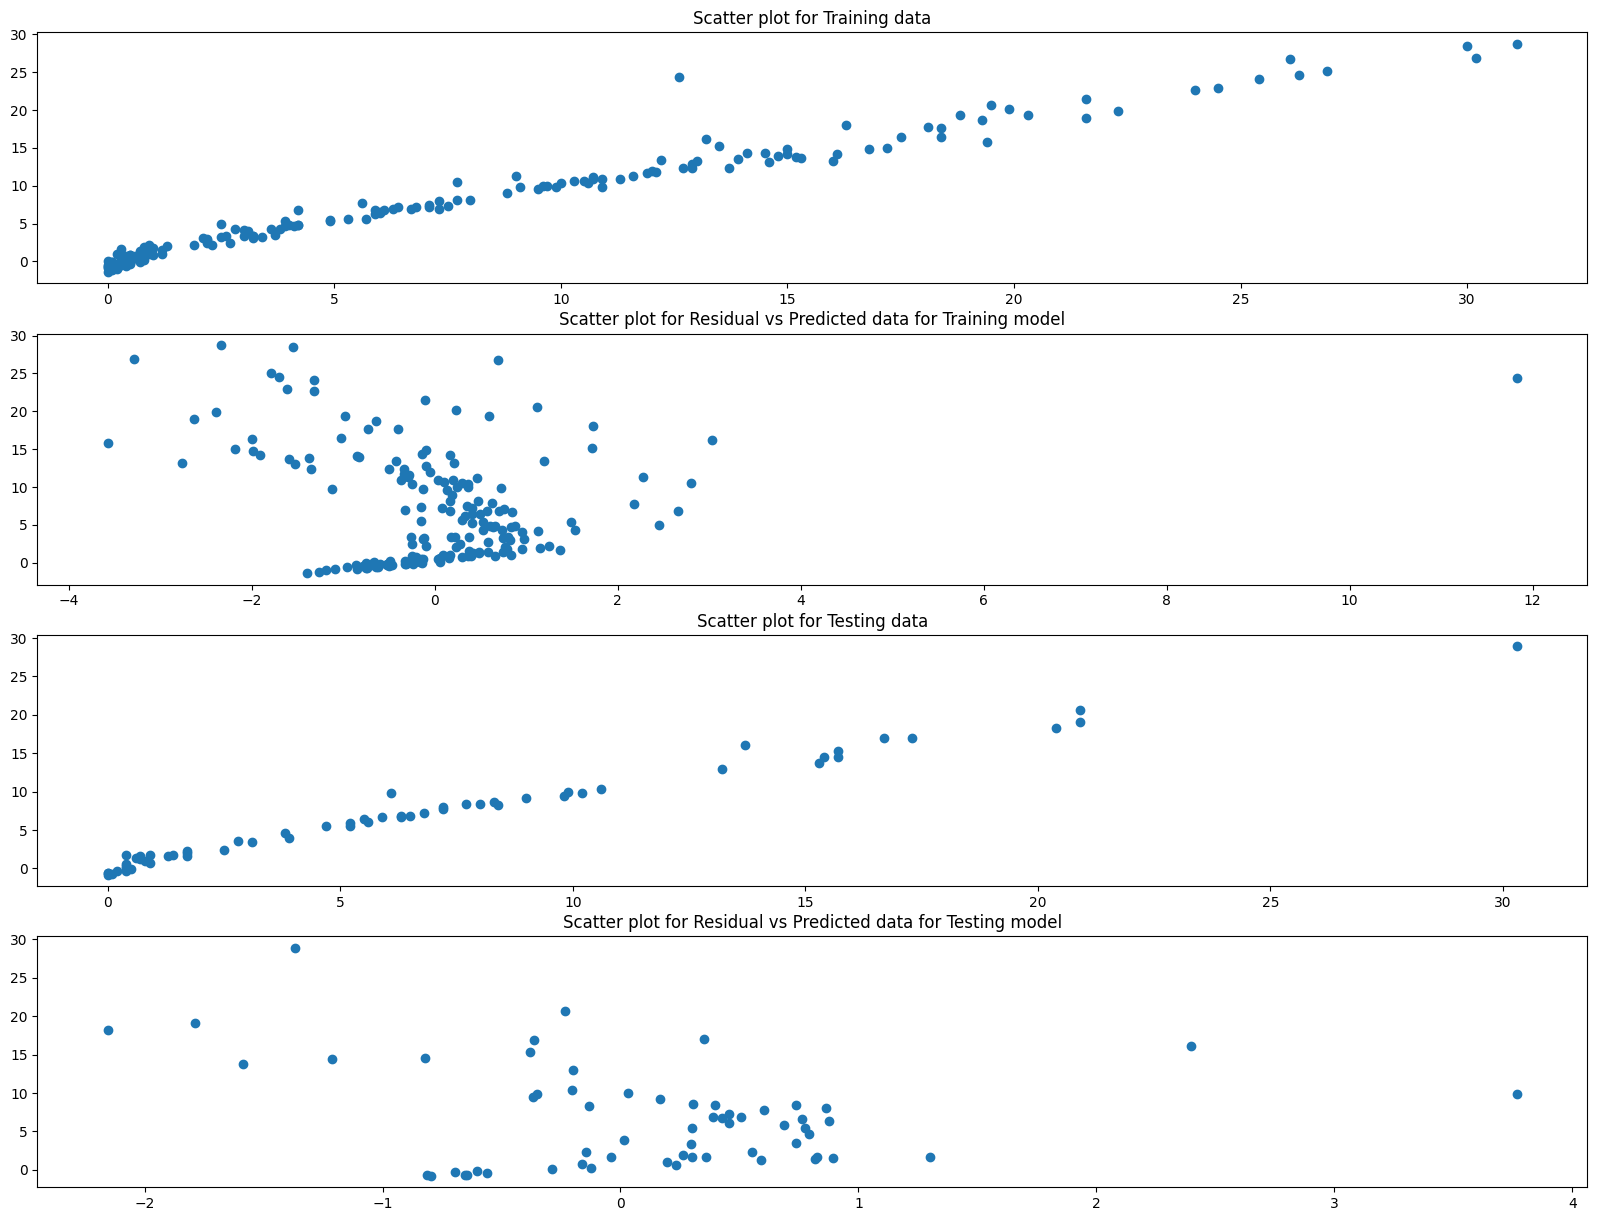

In [74]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

elasticnetcv = ElasticNetCV()
elasticnetcv.fit(x_train_scaled, y_train)
y_train_pred_elasticnetcv = elasticnetcv.predict(x_train_scaled)
y_test_pred_elasticnetcv = elasticnetcv.predict(x_test_scaled)
resid_train_elasticnetcv = y_train_pred_elasticnetcv - y_train
resid_test_elasticnetcv = y_test_pred_elasticnetcv - y_test

rmse_test_elasticnetcv = root_mean_squared_error(y_test,y_test_pred_elasticnetcv)
score_test_elasticnetcv = r2_score(y_test,y_test_pred_elasticnetcv)

rmse_train_elasticnetcv = root_mean_squared_error(y_train,y_train_pred_elasticnetcv)
score_train_elasticnetcv = r2_score(y_train,y_train_pred_elasticnetcv)


fig=plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.scatter(y_train,y_train_pred_elasticnetcv)
plt.title("Scatter plot for Training data")

plt.subplot(4,1,2)
plt.scatter(resid_train_elasticnetcv,y_train_pred_elasticnetcv)
plt.title("Scatter plot for Residual vs Predicted data for Training model")

plt.subplot(4,1,3)
plt.scatter(y_test,y_test_pred_elasticnetcv)
plt.title("Scatter plot for Testing data")

plt.subplot(4,1,4)
plt.scatter(resid_test_elasticnetcv,y_test_pred_elasticnetcv)
plt.title("Scatter plot for Residual vs Predicted data for Testing model")

In [75]:
print(f"Root mean squared error for ElasticNetCV Regression Test model is {rmse_test_elasticnetcv}")
print(f"Root mean squared error for ElasticNetCV Regression Train model is {rmse_train_elasticnetcv}")

Root mean squared error for ElasticNetCV Regression Test model is 0.906798236449336
Root mean squared error for ElasticNetCV Regression Train model is 1.3517475093375104


In [76]:
print(f"Root mean squared error for ElasticNetCV Regression Test model is {score_test_elasticnetcv}")
print(f"Root mean squared error for ElasticNetCV Regression Train model is {score_train_elasticnetcv}")

Root mean squared error for ElasticNetCV Regression Test model is 0.9814217587854941
Root mean squared error for ElasticNetCV Regression Train model is 0.9688828442730821


In [77]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [78]:
elasticnetcv.alpha_

np.float64(0.04311146156383891)

##After Comparing the R squared values of all the model, we choose Linear Regression

In [79]:
import pickle

In [80]:
pickle.dump(scaler, open("Scaler.pkl","wb"))
pickle.dump(linreg,open("Linear_Regression.pkl","wb"))